# Simulating other Variables
For now we have simulated uniformly and according to some set finite sequence of probabilities. It is also possible to obtain other distributions by transforming a uniform random variable. In fact we already did this for the dice example earlier. As a first example let's consider a random variable U2 that is distributed like the square of a normally distributed random variable. In this example we use a kernel density estimate instead of a regular histogram in order to obtain a smoothed out plot. 

In [ ]:
import micropip


await micropip.install("seaborn")

ModuleNotFoundError: No module named 'micropip'

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

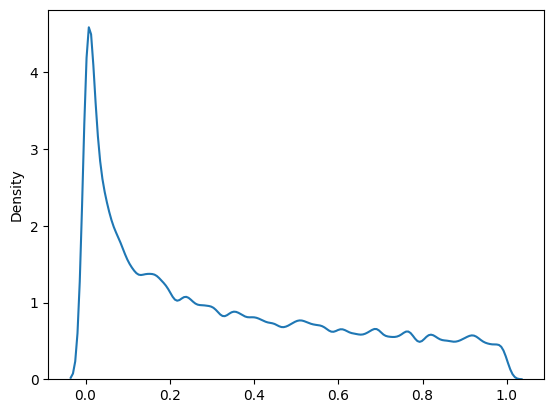

In [ ]:
U2 = np.random.uniform(size=10000) ** 2

sns.kdeplot(U2, bw_adjust=0.25)
plt.show()

Similarly we can simulate random variables with other known distributions, for instance we know that if $U\sim U(0,1)$ then  $\frac{-\ln(1-U)}{\lambda}$ follows an $\text{Exp}(\lambda)$ distribution. Indeed you may check this by computing the relevant distribution function. So we may simulate an exponentially distributed random variable as below.  

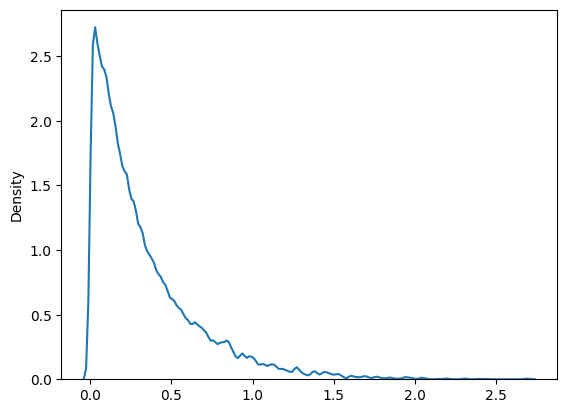

In [ ]:
E3 = -np.log(1 - np.random.uniform(size=10000)) / 3

sns.kdeplot(E3, bw_adjust=0.25)
plt.show()

Similary we can find that $(1-U)^{-\frac{1}{\alpha}}$ follows a $\text{Par}(\alpha, 1)$ distribution.

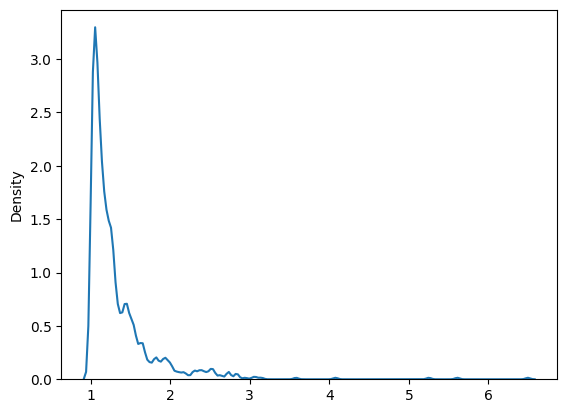

In [ ]:
Par4 = (1 - np.random.uniform(size=1000)) ** (-1 / 4)

sns.kdeplot(Par4, bw_adjust=0.25)
plt.show()

For some of the most used distributions it would be a hassle to have to go through the process of figuring out how to transform the uniform distribution each time. For this reason they are callable directly as you can see below for the exponential, binomial and normal distributions. Have a look at the documentation of these to find out how to enter the parameters. For instance for to get an $\text{Exp}(3)$ distribution below we enter the parameter $\frac{1}{3}$ and for the normal distribution we enter the standard deviation as a parameter instead of the variance. 

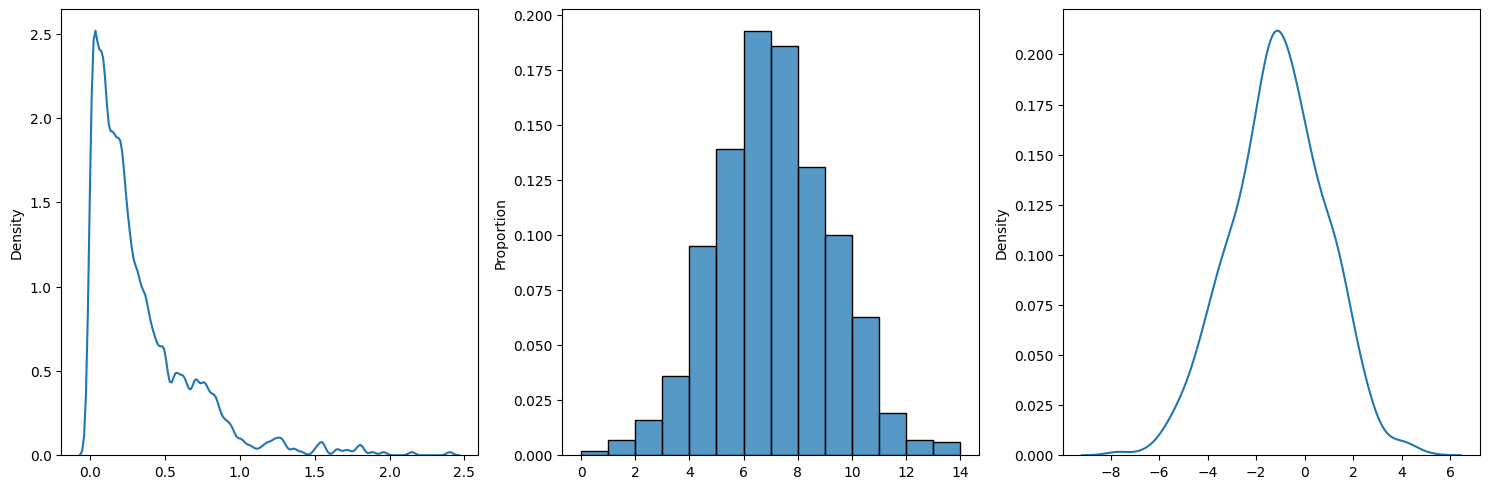

In [ ]:
E3 = np.random.exponential(1 / 3, 1000)
B_20_third = np.random.binomial(20, 1 / 3, 1000)
Nminus14 = np.random.normal(-1, 2, 1000)


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.kdeplot(E3, bw_adjust=0.25)


plt.subplot(1, 3, 2)
sns.histplot(B_20_third, stat="proportion", binwidth=1)


plt.subplot(1, 3, 3)
sns.kdeplot(Nminus14)

plt.tight_layout()
plt.show()

The pictures generated here show the simulated values. For reference here is a plot comparing them to the relevant probability density functions and probability mass function. 

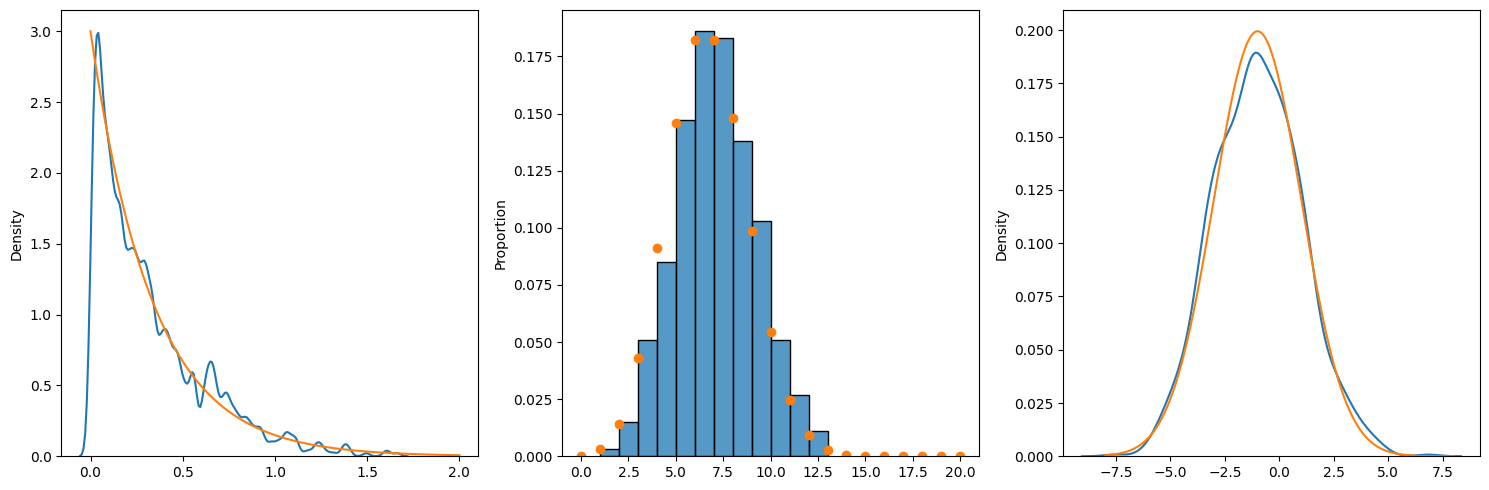

In [ ]:
E3 = np.random.exponential(1 / 3, 1000)
B_20_third = np.random.binomial(20, 1 / 3, 1000)
Nminus14 = np.random.normal(-1, 2, 1000)


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.kdeplot(E3, bw_adjust=0.25)
x = np.linspace(0, 2, 500)
y = 3 * np.exp(-3 * x)
plt.plot(x, y)


plt.subplot(1, 3, 2)
sns.histplot(B_20_third, stat="proportion", binwidth=1)
x = np.linspace(0, 20, 21)
y = sp.special.binom(20, x) * ((1 / 3) ** x) * (2 / 3) ** (20 - x)
plt.scatter(x, y)

plt.subplot(1, 3, 3)
sns.kdeplot(Nminus14)
x = np.linspace(-8, 8, 500)
y = (1 / np.sqrt(2 * np.pi * 4)) * np.exp(-0.5 * (x + 1) * (x + 1) / 4)
plt.plot(x, y)

plt.tight_layout()
plt.show()